classifiy and stack

In [1]:
import numpy as np
import pandas as pd
import cfg
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import jieba
import seaborn as sns
import plotly.offline as py

py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

df_all = pd.read_pickle(cfg.data_path + 'df_all_1k.pkl')
df_all.head()

<script>requirejs.config({paths: { 'plotly': ['https://cdn.plot.ly/plotly-latest.min']},});if(!window.Plotly) {{require(['plotly'],function(plotly) {window.Plotly=plotly;});}}</script>

,Id,label,query,type,query_seg,query_seg_no_stopword,query_length,author_label
0,0,3,今年22岁，即将在2014年6月毕业的西昌学院大四学生吴学娅选择不大。作为食品专业的学生，她...,train,今年 22 岁 ， 即将 在 2014 年 6 月 毕业 的 西昌 学院 大四 学生 吴学娅...,今年 22 岁 2014 毕业 西昌 学院 大四 学生 吴学娅 选择 食品 专业 学生 去年...,510,Machine Summary
1,1,2,"“现在我们每天生产40万到50万个，回收4,000-5,000个包括我们生产的死灯泡。”他说...",train,"“ 现在 我们 每天 生产 40 万到 50 万个 ， 回收 4 , 000 - 5 , 0...",现在 每天 生产 40 万到 50 万个 回收 000 000 包括 生产 死 灯泡 说 Y...,368,Machine Translate
2,2,0,。记者悄悄来到医院二楼病房。只见一名睫毛浓密、皮肤黝黑的小姑娘被捆住双脚，躺在病床上。她就是...,train,。 记者 悄悄 来到 医院 二楼 病房 。 只见 一名 睫毛 浓密 、 皮肤 黝黑 的 小姑...,记者 悄悄 来到 医院 二楼 病房 只见 一名 睫毛 浓密 皮肤 黝黑 小姑娘 捆住 双脚 ...,430,Human Author
3,3,2,一带一路倡议被形容为针对印度。反华立场可以帮助印度政治家赢得选票。中国威胁论被夸大了一段时间...,train,一带 一路 倡议 被 形容 为 针对 印度 。 反华 立场 可以 帮助 印度 政治家 赢得 ...,一带 一路 倡议 形容 针对 印度 反华 立场 帮助 印度 政治家 赢得 选票 威胁论 夸大...,391,Machine Translate
4,4,0,如同中国的金融体系没有在这次全球的金融危机中受到重大冲击是得益于中国尚未开放的资本市场和外汇...,train,如同 中国 的 金融体系 没有 在 这次 全球 的 金融危机 中 受到 重大 冲击 是 得益...,如同 金融体系 这次 全球 金融危机 受到 重大 冲击 得益于 尚未 开放 资本 市场 外汇...,499,Human Author


In [2]:
df_tr = df_all.loc[df_all['type'] == 'train']
df_te = df_all.loc[df_all['type'] == 'test']
print('df_tr.shape: ',df_tr.shape)

X = df_tr['query_seg_no_stopword']
y = df_tr['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

print(X_train[:5])
# examine the class distribution in y_train and y_test
print(y_train.value_counts(),'\n', y_test.value_counts())

df_tr.shape:  (900, 8)
(720,) (720,) (180,) (180,)
345    法院 审理 查明 张波 张涛 今年 23 岁 系 孪生兄弟 2007 2009 上半年 二人...
677    以前 取保候审 判处 缓刑 未成年人 处于 放羊 状态 只 需 定期 司法 机关报 就行了 ...
229    新疆 政法委 官员 乃比江 接受 环球时报 记者 专访 表示 以热 比娅 为首 疆独 策划 ...
210    副 部长 崔天凯 具体 阐释 太平洋地区 提供 发展 援助 几个 特点 完全 尊重 受援国 ...
188    G 山 mountain   fragrant   mountain   Beijing 秋...
Name: query_seg_no_stopword, dtype: object
0    241
2    168
1    158
3    153
Name: label, dtype: int64 
 0    59
2    48
1    37
3    36
Name: label, dtype: int64


In [3]:
vect = CountVectorizer(lowercase=False, token_pattern=r'(?u)\b\w+\b|\,|\.|\;|\:')
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w+\\b|\\,|\\.|\\;|\\:',
        tokenizer=None, vocabulary=None)

In [4]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_train_dtm = vect.fit_transform(X_train)

# transform the test data using the earlier fitted vocabulary, into a document-term matrix
X_test_dtm = vect.transform(X_test)
# examine the document-term matrix from X_test
X_train_dtm

<720x24725 sparse matrix of type '<class 'numpy.int64'>'
	with 75816 stored elements in Compressed Sparse Row format>

In [5]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=4, n_iter=500)
lsa.fit(X_train_dtm)
assert isinstance(vect.get_feature_names, object)
terms = vect.get_feature_names()
for i, comp in enumerate(lsa.components_):
    termsInComp = zip(terms, comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1], reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")

Concept 0:
路
类型
项目
平米
配套
周边
售价
公园
装修
建筑
 
Concept 1:
.
亿元
10
增长
0
分别
2
1
5
股份
 
Concept 2:
说
发展
经济
工作
国家
问题
进行
政府
文化
已经
 
Concept 3:
路
说
南
发展
一居
工作
二七
问题
经济
下车
 


In [6]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# tune hyperparameter alpha = [0.01, 0.1, 1, 10, 100]
from sklearn.model_selection import GridSearchCV
grid_values = {'alpha':[0.01, 0.1, 1.0, 10.0, 100.0]}
grid_nb = GridSearchCV(nb, param_grid=grid_values, scoring='neg_log_loss')
grid_nb.fit(X_train_dtm, y_train)
grid_nb.best_params_

{'alpha': 100.0}

In [7]:
# set with recommended hyperparameters
nb = MultinomialNB(alpha=100.0)
# train the model using X_train_dtm & y_train
nb.fit(X_train_dtm, y_train)

# compute the accuracy of training data predictions
y_pred_train = nb.predict(X_train_dtm)
print('train acc:', metrics.accuracy_score(y_train, y_pred_train))

# make author (class) predictions for X_test_dtm
y_pred_test = nb.predict(X_test_dtm)
print('test acc:', metrics.accuracy_score(y_test, y_pred_test))

train acc: 0.7694444444444445
test acc: 0.5444444444444444


Add char count as a feature to martix


In [8]:
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [9]:
from string import punctuation
print('punc:', punctuation)
X_train_chars = X_train.str.len()
X_train_punc = X_train.apply(lambda x: len([c for c in str(x) if c in punctuation]))
X_test_chars = X_test.str.len()
X_test_punc = X_test.apply(lambda x: len([c for c in str(x) if c in punctuation]))
print(X_train_punc[:5])

print(X_train_chars[:5])

X_train_dtm = add_feature(X_train_dtm, [X_train_chars, X_train_punc])
X_test_dtm = add_feature(X_test_dtm, [X_test_chars, X_test_punc])

X_train_dtm

punc: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
345    0
677    2
229    0
210    0
188    0
Name: query_seg_no_stopword, dtype: int64
345    281
677    441
229    385
210    491
188    452
Name: query_seg_no_stopword, dtype: int64


<720x24727 sparse matrix of type '<class 'numpy.int64'>'
	with 76684 stored elements in Compressed Sparse Row format>

In [10]:
# set with recommended hyperparameters
nb = MultinomialNB(alpha=0.1)
# train the model using X_train_dtm & y_train
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [11]:
# compute the accuracy of training data predictions
y_pred_train = nb.predict(X_train_dtm)
print('train acc:', metrics.accuracy_score(y_train, y_pred_train))

# make author (class) predictions for X_test_dtm
y_pred_test = nb.predict(X_test_dtm)
print('test acc:', metrics.accuracy_score(y_test, y_pred_test))

# look at the confusion matrix for y_test
print(metrics.confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

train acc: 1.0
test acc: 0.6722222222222223
[[32  1  6 20]
 [ 1 27  7  2]
 [ 0  0 47  1]
 [14  1  6 15]]
             precision    recall  f1-score   support

          0       0.68      0.54      0.60        59
          1       0.93      0.73      0.82        37
          2       0.71      0.98      0.82        48
          3       0.39      0.42      0.41        36

avg / total       0.68      0.67      0.67       180



In [12]:
# calculate predicted probabilities for X_test_dtm
y_pred_prob = nb.predict_proba(X_test_dtm)
print(y_pred_prob[:5])

[[1.47932821e-031 1.53335476e-060 1.00000000e+000 2.19730162e-044]
 [1.72949788e-014 2.03686661e-076 4.59114959e-018 1.00000000e+000]
 [1.94611621e-012 2.02300294e-151 6.32873974e-071 1.00000000e+000]
 [3.28504088e-036 3.06193418e-032 1.00000000e+000 1.97663592e-043]
 [1.00000000e+000 4.24750725e-087 1.53432721e-028 1.14652928e-029]]


using Logistic Regression

In [13]:
# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)

In [14]:
# tune hyperparameter
grid_values = {'C':[0.01, 0.1, 1.0, 3.0, 5.0]}
grid_logreg = GridSearchCV(logreg, param_grid=grid_values, scoring='neg_log_loss')
grid_logreg.fit(X_train_dtm, y_train)
grid_logreg.best_params_

{'C': 0.1}

In [15]:
# set with recommended parameter
logreg = LogisticRegression(C=0.1, random_state=0)
# train the model using X_train_dtm & y_train
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
# compute the accuracy of training data predictions
y_pred_train = logreg.predict(X_train_dtm)
print('train acc:', metrics.accuracy_score(y_train, y_pred_train))

# make author (class) predictions for X_test_dtm
y_pred_test = logreg.predict(X_test_dtm)
print('test acc:', metrics.accuracy_score(y_test, y_pred_test))

train acc: 1.0
test acc: 0.6888888888888889


In [22]:
# import and instantiate the XGB model
from xgboost import XGBClassifier
model = XGBClassifier()

In [24]:
# tune hyperparameter
grid_values = {'max_depth': [3, 5, 7]}
grid_logreg = GridSearchCV(model, param_grid=grid_values, scoring='neg_log_loss')
grid_logreg.fit(X_train_dtm, y_train)
grid_logreg.best_params_

{'max_depth': 5}

In [25]:
# set with recommended parameter
model = XGBClassifier(max_depth=5)
# train the model using X_train_dtm & y_train
model.fit(X_train_dtm, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [26]:
# compute the accuracy of training data predictions
y_pred_train = model.predict(X_train_dtm)
print('train acc:', metrics.accuracy_score(y_train, y_pred_train))

# make author (class) predictions for X_test_dtm
y_pred_test = model.predict(X_test_dtm)
print('test acc:', metrics.accuracy_score(y_test, y_pred_test))

train acc: 0.9972222222222222
test acc: 0.6611111111111111


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



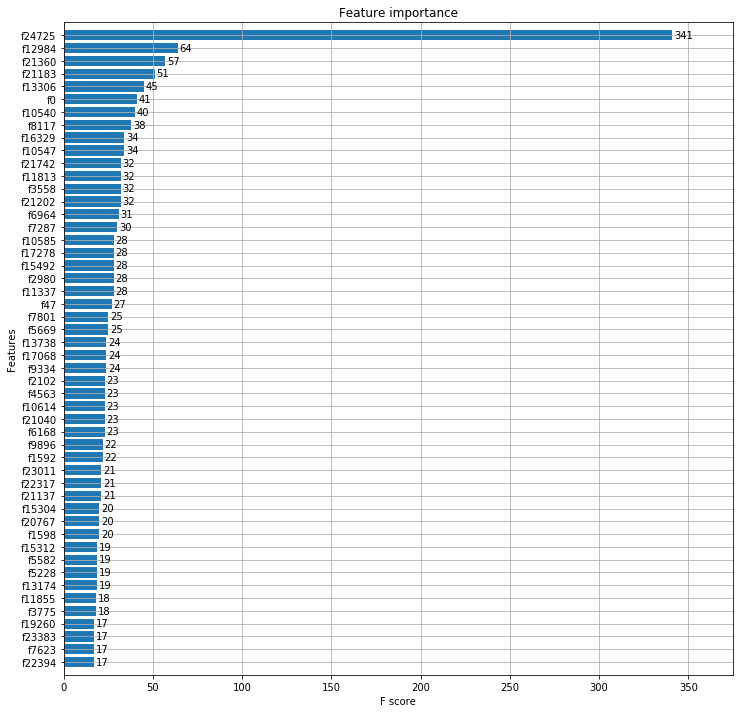

In [31]:
import xgboost as xgb
### Plot the important variables ###
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

confusion matrix

In [35]:
import itertools
from sklearn.metrics import confusion_matrix

### From http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py #
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[34  1  8 16]
 [ 5 27  4  1]
 [ 8  1 38  1]
 [14  0  2 20]]


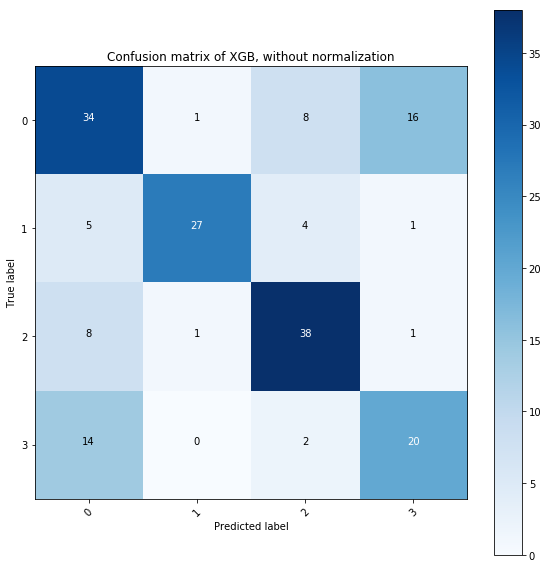

In [37]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print(cnf_matrix)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3],
                      title='Confusion matrix of XGB, without normalization')
plt.show()